In [36]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
#khai báo thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from IPython.display import clear_output

In [38]:
data = pd.read_csv('./final_data.csv',encoding='latin-1') # đọc data
data #đọc data

,Name,Producer,CPU,Ram,Type disk,Capacity,Type GPU,VRAM,Size Display,Relu Display,Price
0,laptop acer gaming nitro 5 eagle an515-57-720a...,acer,I7,8,1,512,1,4.0,15.6,1920x1080,29740000
1,laptop lg gram 2021 16z90p-g.ah73a5 (core i7-1...,lg,I7,16,1,256,0,0.0,16.0,2560x1600,46490000
2,laptop asus rog strix g15 g513ic-hn002t (ryzen...,asus,R7,8,1,512,1,4.0,15.6,1920x1080,27240000
3,laptop lenovo v15 g2 itl 82kb00chvn (core i5-...,lenovo,I5,8,1,256,0,0.0,15.6,1920x1080,17444500
4,laptop asus tuf gaming a15 fa506qm-hn016t (ryz...,asus,R7,16,1,512,1,6.0,15.6,1920x1080,32340000
...,...,...,...,...,...,...,...,...,...,...,...
1183,laptop asus ux482ea-ka274t 90nb0s41-m05030 ( 1...,asus,I5,8,1,512,0,0.0,13.3,2560x1600,32990000
1184,laptop asus ux482ea-ka268t 90nb0s41-m05040 ( 1...,asus,I7,16,1,1024,0,0.0,13.3,2560x1600,39990000
1185,laptop dell alienware m15 ryzen edition r5 702...,dell,R9,16,1,1024,0,0.0,13.3,2560x1600,57990000
1186,"laptop dell alienware m15 r6 70262923 ( 15.6"" ...",dell,I7,32,1,1024,0,0.0,13.3,2560x1600,65490000


TIỀN XỬ LÍ

In [39]:
data.isnull().sum() # check data rỗng

Name            0
Producer        3
CPU             0
Ram             0
Type disk       0
Capacity        0
Type GPU        0
VRAM            6
Size Display    1
Relu Display    0
Price           0
dtype: int64

In [40]:
data= data.dropna() # do data bị missing value đủ bé nên bỏ qua các trường bị thiếu

In [41]:
def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]
def return0():
  return 0
#finding the x_res and y_res from screen resolution
data['X_res'] = data['Relu Display'].apply(lambda x: findXresolution(x))
data['Y_res'] = data['Relu Display'].apply(lambda y: findYresolution(y))
#convert to numeric
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')
# data['hdd']= data['Relu Display'].apply(lambda hdd: return0())
# data['ssd']= data['Relu Display'].apply(lambda ssd: return0())
clear_output()

In [42]:
Typedisk = [x for x in data['Type disk']]
Capacity_disk = [x for x in data['Capacity']]
def convert_disk(type_disk, capacity_disk):
    SSD = []
    HDD = []
    for i in range(0, len(type_disk)):
        if type_disk[i] == 1:
            SSD.append(capacity_disk[i])
            HDD.append(0)
        else:
            HDD.append(capacity_disk[i])
            SSD.append(0)
    return SSD, HDD
ssd,hdd=convert_disk(Typedisk, Capacity_disk)
data['ssd']=ssd
data['hdd']=hdd
clear_output()

In [43]:
data

,Name,Producer,CPU,Ram,Type disk,Capacity,Type GPU,VRAM,Size Display,Relu Display,Price,X_res,Y_res,ssd,hdd
0,laptop acer gaming nitro 5 eagle an515-57-720a...,acer,I7,8,1,512,1,4.0,15.6,1920x1080,29740000,1920,1080,512,0
1,laptop lg gram 2021 16z90p-g.ah73a5 (core i7-1...,lg,I7,16,1,256,0,0.0,16.0,2560x1600,46490000,2560,1600,256,0
2,laptop asus rog strix g15 g513ic-hn002t (ryzen...,asus,R7,8,1,512,1,4.0,15.6,1920x1080,27240000,1920,1080,512,0
3,laptop lenovo v15 g2 itl 82kb00chvn (core i5-...,lenovo,I5,8,1,256,0,0.0,15.6,1920x1080,17444500,1920,1080,256,0
4,laptop asus tuf gaming a15 fa506qm-hn016t (ryz...,asus,R7,16,1,512,1,6.0,15.6,1920x1080,32340000,1920,1080,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,laptop asus ux482ea-ka274t 90nb0s41-m05030 ( 1...,asus,I5,8,1,512,0,0.0,13.3,2560x1600,32990000,2560,1600,512,0
1184,laptop asus ux482ea-ka268t 90nb0s41-m05040 ( 1...,asus,I7,16,1,1024,0,0.0,13.3,2560x1600,39990000,2560,1600,1024,0
1185,laptop dell alienware m15 ryzen edition r5 702...,dell,R9,16,1,1024,0,0.0,13.3,2560x1600,57990000,2560,1600,1024,0
1186,"laptop dell alienware m15 r6 70262923 ( 15.6"" ...",dell,I7,32,1,1024,0,0.0,13.3,2560x1600,65490000,2560,1600,1024,0


In [44]:
data.info() # check data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 0 to 1187
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1178 non-null   object 
 1   Producer      1178 non-null   object 
 2   CPU           1178 non-null   object 
 3   Ram           1178 non-null   int64  
 4   Type disk     1178 non-null   int64  
 5   Capacity      1178 non-null   int64  
 6   Type GPU      1178 non-null   int64  
 7   VRAM          1178 non-null   float64
 8   Size Display  1178 non-null   float64
 9   Relu Display  1178 non-null   object 
 10  Price         1178 non-null   int64  
 11  X_res         1178 non-null   int64  
 12  Y_res         1178 non-null   int64  
 13  ssd           1178 non-null   int64  
 14  hdd           1178 non-null   int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 147.2+ KB


In [45]:
data.describe()

,Ram,Type disk,Capacity,Type GPU,VRAM,Size Display,Price,X_res,Y_res,ssd,hdd
count,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1.178000e+03,1178.000000,1178.000000,1178.000000,1178.000000
mean,11.022071,0.928693,541.420204,0.342954,1.285229,14.625297,2.863758e+07,2033.482173,1170.146010,505.752971,35.667233
std,7.435559,0.257447,316.803450,0.474898,2.599615,1.198550,1.538173e+07,329.478319,229.499575,337.511163,150.196240
min,4.000000,0.000000,1.000000,0.000000,0.000000,4.000000,6.145000e+06,1080.000000,768.000000,0.000000,0.000000
25%,8.000000,1.000000,256.000000,0.000000,0.000000,14.000000,1.894900e+07,1920.000000,1080.000000,256.000000,0.000000
50%,8.000000,1.000000,512.000000,0.000000,0.000000,14.000000,2.354000e+07,1920.000000,1080.000000,512.000000,0.000000
75%,16.000000,1.000000,512.000000,1.000000,2.000000,15.600000,3.412600e+07,1920.000000,1080.000000,512.000000,0.000000
max,64.000000,1.000000,2048.000000,1.000000,16.000000,17.300000,1.150000e+08,3840.000000,2400.000000,2048.000000,2048.000000


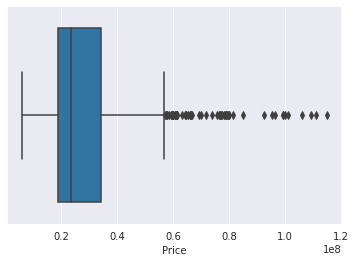

In [46]:
sns.boxplot(x = 'Price', data = data) # boxplot giá

[Text(0.5, 1.0, 'giá chuẩn hóa với log transform')]

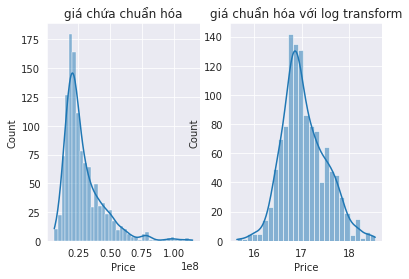

In [47]:
# chuẩn hóa giá bằng log transform
y = data['Price']
y_log = np.log(data['Price'])
plt.subplot(1,2,1)
sns.histplot(x = y, data = y, kde = True).set(title = 'giá chứa chuẩn hóa')
plt.subplot(1,2,2)
sns.histplot(x = y_log, data = y_log , kde = True).set(title = 'giá chuẩn hóa với log transform')

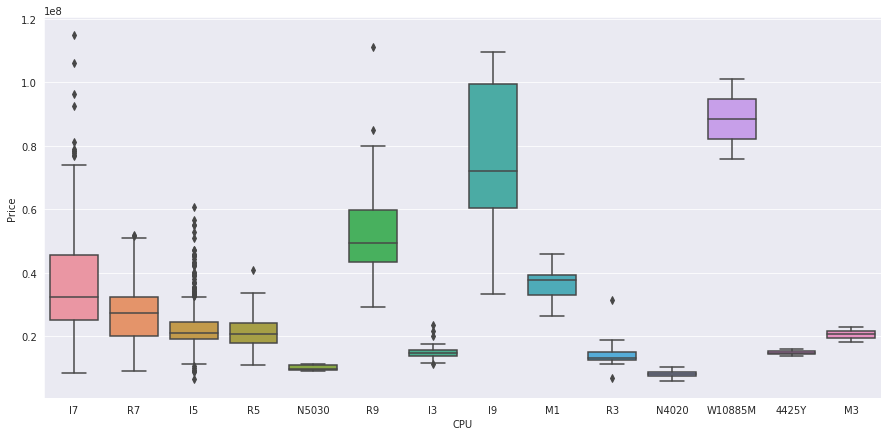

In [48]:
plt.figure(figsize = (15,7))
sns.boxplot(x = 'CPU',y = 'Price', data = data)

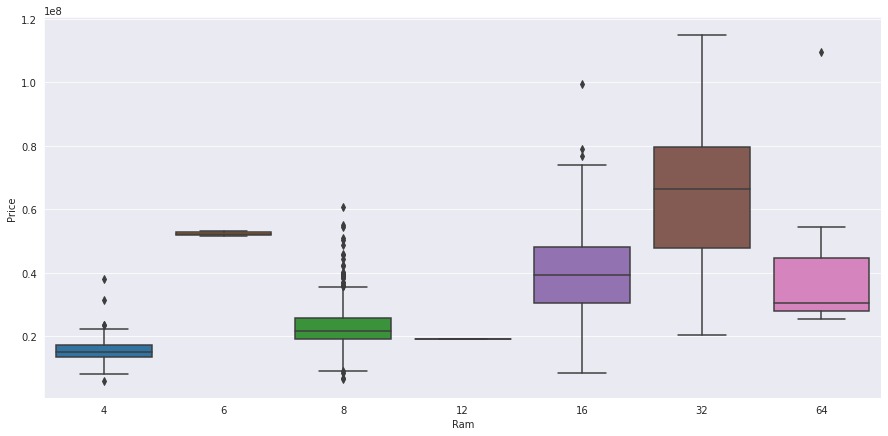

In [49]:
plt.figure(figsize = (15,7))
sns.boxplot(x = 'Ram',y = 'Price', data = data)

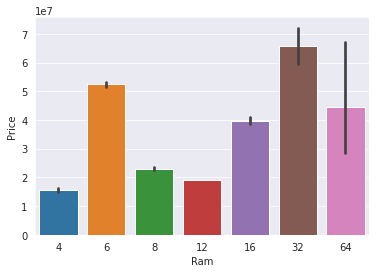

In [50]:
sns.barplot(
        x = data['Ram'],
        y = 'Price',
        data = data
    )

In [51]:
data.info() # check data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 0 to 1187
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1178 non-null   object 
 1   Producer      1178 non-null   object 
 2   CPU           1178 non-null   object 
 3   Ram           1178 non-null   int64  
 4   Type disk     1178 non-null   int64  
 5   Capacity      1178 non-null   int64  
 6   Type GPU      1178 non-null   int64  
 7   VRAM          1178 non-null   float64
 8   Size Display  1178 non-null   float64
 9   Relu Display  1178 non-null   object 
 10  Price         1178 non-null   int64  
 11  X_res         1178 non-null   int64  
 12  Y_res         1178 non-null   int64  
 13  ssd           1178 non-null   int64  
 14  hdd           1178 non-null   int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 187.2+ KB


In [52]:
a=[i for i in data['Type disk']]
b=[]
c=0
d=0
for i in a:
  if i>0 :
    b.append('hdd')
    c+=1
  else:
    b.append('ssd')
    d+=1
print('hdd=',d)
print('ssd=',c)

hdd= 84
ssd= 1094


In [53]:
data = data.drop(['Name', 'Producer', 'CPU','Type GPU','Relu Display','Type disk','Capacity',], axis = 1)

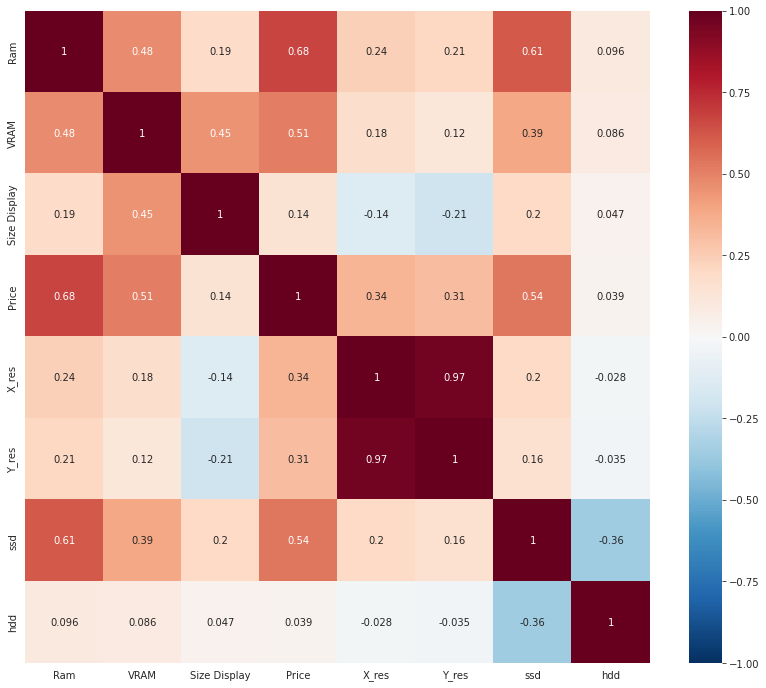

In [54]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),center = 0,annot = True,vmin = -1.0,vmax = 1.0,cmap = 'RdBu_r',data = data)

In [91]:
data=data.drop(['Price'], axis = 1)

In [92]:
data

,Ram,VRAM,Size Display,X_res,Y_res,ssd,hdd
0,8,4.0,15.6,1920,1080,512,0
1,16,0.0,16.0,2560,1600,256,0
2,8,4.0,15.6,1920,1080,512,0
3,8,0.0,15.6,1920,1080,256,0
4,16,6.0,15.6,1920,1080,512,0
...,...,...,...,...,...,...,...
1183,8,0.0,13.3,2560,1600,512,0
1184,16,0.0,13.3,2560,1600,1024,0
1185,16,0.0,13.3,2560,1600,1024,0
1186,32,0.0,13.3,2560,1600,1024,0


In [101]:
from sklearn.model_selection import train_test_split,KFold
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.1, random_state = 42)

In [102]:
import pandas as pd
X_array= pd.DataFrame(X_train).to_numpy()
y_array=pd.DataFrame(y_train).to_numpy()

In [116]:
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
trees = [10,50,100,250,500,1000,1500]
scores = []
for tree in trees:
    print("Index: ", trees.index(tree))
    sc = 0

    for train_index, test_index in kf.split(X_array):
        X_trainf, X_testf = X_array[train_index], X_array[test_index]
        y_trainf, y_testf = y_array[train_index], y_array[test_index]
        regr = RandomForestRegressor(n_estimators=tree , random_state=0)
        regr.fit(X_trainf,y_trainf)
        y_predict=regr.predict(X_testf)
        sc += mean_absolute_error(y_testf,y_predict)
    scores.append(sc / 10)
    clear_output()
    print("Done index: ", trees.index(tree))



Done index:  6


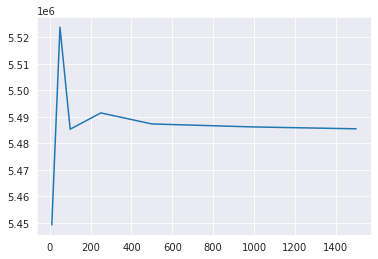

In [117]:
plt.plot(trees,scores)

In [128]:
regr = RandomForestRegressor(n_estimators=1700 , random_state=0)
regr.fit(data,y)
y_predict=regr.predict(X_test)
print(mean_squared_error(y_test,y_predict))

36654885219603.18


In [96]:
X_train

,Ram,VRAM,Size Display,X_res,Y_res,ssd,hdd
954,8,0.0,14.0,1920,1080,1024,0
390,8,4.0,15.6,1920,1080,512,0
806,8,0.0,13.3,2560,1600,512,0
976,8,0.0,15.6,1920,1080,512,0
163,16,8.0,15.6,2560,1440,1024,0
...,...,...,...,...,...,...,...
1051,8,0.0,13.3,2560,1600,512,0
1103,16,0.0,13.3,1920,1080,1024,0
1140,4,0.0,13.3,2560,1600,256,0
865,8,0.0,15.6,1920,1080,512,0


In [132]:
import pickle
%cd '/content/drive/MyDrive/khoa học dữ liệu'
filename = 'Laptop.sav'
pickle.dump(regr, open(filename, 'wb'))

/content/drive/MyDrive/khoa học dữ liệu


In [133]:
filename = 'Laptop.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_predict=loaded_model.predict(X_test)
print(mean_squared_error(y_test,y_predict))

36654885219603.18
